In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf

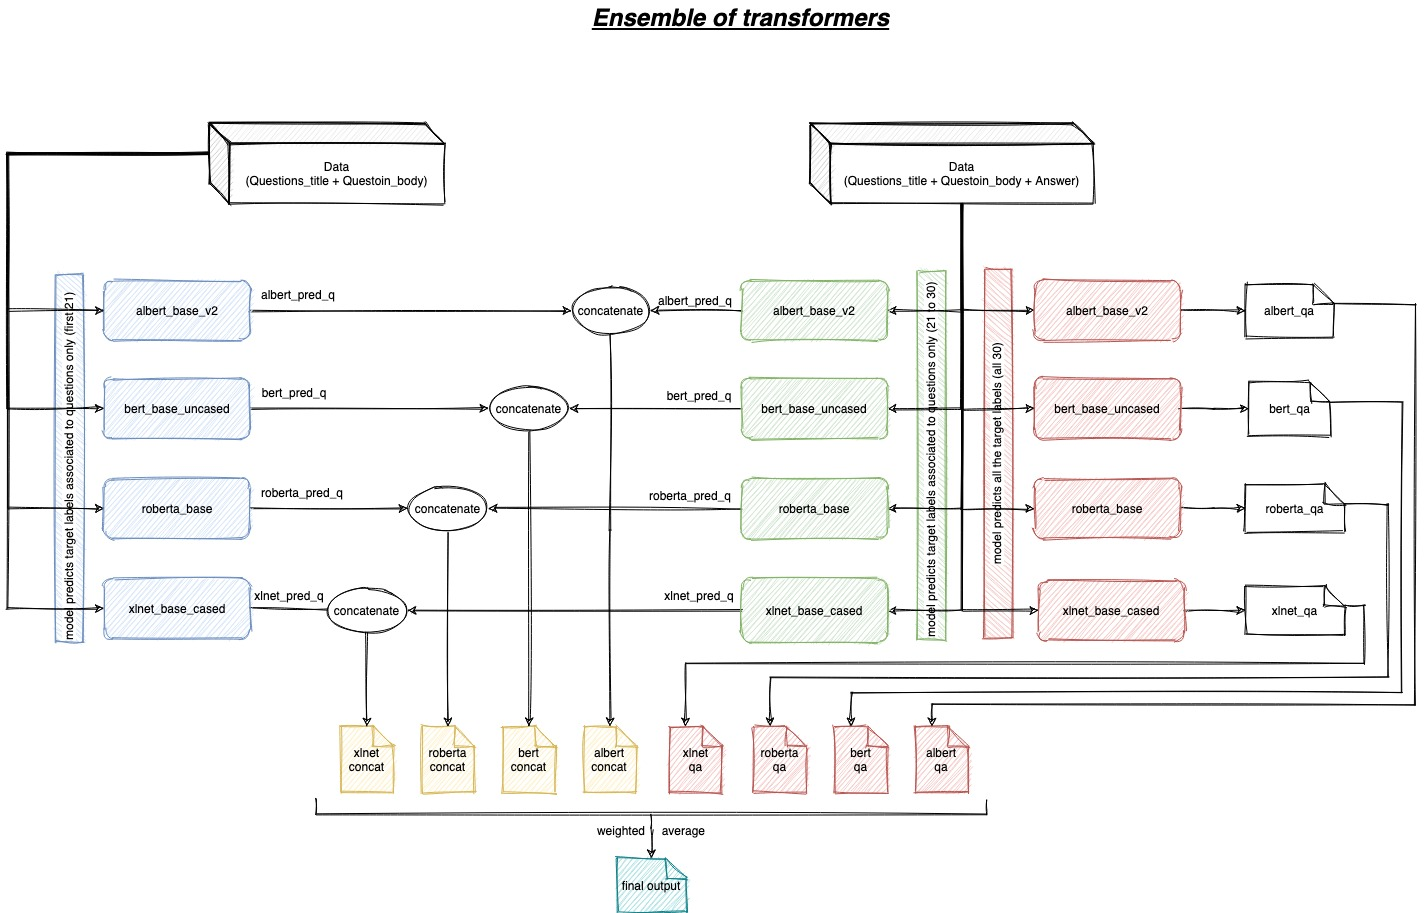

In [27]:
# Ensemble of transformer architecture
%matplotlib inline
from IPython.display import Image
Image('diagram_ensemble.jpg')

In [ ]:
!wget 'https://github.com/SarthakV7/Kaggle_google_quest_challenge/blob/master/transformers_data.zip?raw=true'
!mv 'transformers_data.zip?raw=true' 'transformers_data.zip'
!unzip transformers_data

In [ ]:
# performance comparasion of all the transformers used

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model","dataset","train loss","cv loss","train rhos","cv rhos"]
x.add_row(['bert_base_uncased','questions',0.3393, 0.3302, 0.5543, 0.6013])
x.add_row(['bert_base_uncased','answer',0.3320, 0.3278, 0.4967, 0.5438])
x.add_row(['bert_base_uncased','question+answer',0.3287, 0.3166, 0.5511, 0.6109])

x.add_row(['roberta_base','questions',0.3542, 0.3400, 0.4953, 0.5674])
x.add_row(['roberta_base','answer',0.3430, 0.3253, 0.3927, 0.4993])
x.add_row(['roberta_base','question+answer',0.3546, 0.3397, 0.4305, 0.5082])

x.add_row(['albert_base_v2','questions',0.4022, 0.3785, 0.3252, 0.4341])
x.add_row(['albert_base_v2','answer',0.3829, 0.3660, 0.2278, 0.3438])
x.add_row(['albert_base_v2','question+answer',0.4046, 0.3790, 0.2619, 0.3680])

x.add_row(['xlnet_base_cased','questions',0.3662, 0.3412, 0.4679, 0.5685])
x.add_row(['xlnet_base_cased','answer',0.3611, 0.3401, 0.3531, 0.4702])
x.add_row(['xlnet_base_cased','question+answer',0.3721, 0.3452, 0.3942, 0.5013])
print(x)

+-------------------+-----------------+------------+---------+------------+---------+
|       model       |     dataset     | train loss | cv loss | train rhos | cv rhos |
+-------------------+-----------------+------------+---------+------------+---------+
| bert_base_uncased |    questions    |   0.3393   |  0.3302 |   0.5543   |  0.6013 |
| bert_base_uncased |      answer     |   0.332    |  0.3278 |   0.4967   |  0.5438 |
| bert_base_uncased | question+answer |   0.3287   |  0.3166 |   0.5511   |  0.6109 |
|    roberta_base   |    questions    |   0.3542   |   0.34  |   0.4953   |  0.5674 |
|    roberta_base   |      answer     |   0.343    |  0.3253 |   0.3927   |  0.4993 |
|    roberta_base   | question+answer |   0.3546   |  0.3397 |   0.4305   |  0.5082 |
|   albert_base_v2  |    questions    |   0.4022   |  0.3785 |   0.3252   |  0.4341 |
|   albert_base_v2  |      answer     |   0.3829   |  0.366  |   0.2278   |  0.3438 |
|   albert_base_v2  | question+answer |   0.4046   |  

In [ ]:
# Importing the predicted labels of albert
albert_train_q = pd.read_csv('transformers_data/albert_pred_q_train.csv')
albert_test_q = pd.read_csv('transformers_data/albert_pred_q_test.csv')
albert_train_a = pd.read_csv('transformers_data/albert_pred_a_train.csv')
albert_test_a = pd.read_csv('transformers_data/albert_pred_a_test.csv')
albert_train_qa = pd.read_csv('transformers_data/albert_pred_qa_train.csv')
albert_test_qa = pd.read_csv('transformers_data/albert_pred_qa_test.csv')

albert_train_concat = pd.concat([albert_train_q, albert_train_a], axis=1)
albert_test_concat = pd.concat([albert_test_q, albert_test_a], axis=1)

In [ ]:
# Importing the predicted labels of bert
bert_train_q = pd.read_csv('transformers_data/bert_pred_q_train.csv')
bert_test_q = pd.read_csv('transformers_data/bert_pred_q_test.csv')
bert_train_a = pd.read_csv('transformers_data/bert_pred_a_train.csv')
bert_test_a = pd.read_csv('transformers_data/bert_pred_a_test.csv')
bert_train_qa = pd.read_csv('transformers_data/bert_pred_qa_train.csv')
bert_test_qa = pd.read_csv('transformers_data/bert_pred_qa_test.csv')

bert_train_concat = pd.concat([bert_train_q, bert_train_a], axis=1)
bert_test_concat = pd.concat([bert_test_q, bert_test_a], axis=1)

In [ ]:
# Importing the predicted labels of roberta
roberta_train_q = pd.read_csv('transformers_data/roberta_pred_q_train.csv')
roberta_test_q = pd.read_csv('transformers_data/roberta_pred_q_test.csv')
roberta_train_a = pd.read_csv('transformers_data/roberta_pred_a_train.csv')
roberta_test_a = pd.read_csv('transformers_data/roberta_pred_a_test.csv')
roberta_train_qa = pd.read_csv('transformers_data/roberta_pred_qa_train.csv')
roberta_test_qa = pd.read_csv('transformers_data/roberta_pred_qa_test.csv')

roberta_train_concat = pd.concat([roberta_train_q, roberta_train_a], axis=1)
roberta_test_concat = pd.concat([roberta_test_q, roberta_test_a], axis=1)

In [ ]:
# Importing the predicted labels of xlnet
xlnet_train_q = pd.read_csv('transformers_data/xlnet_pred_q_train.csv')
xlnet_test_q = pd.read_csv('transformers_data/xlnet_pred_q_test.csv')
xlnet_train_a = pd.read_csv('transformers_data/xlnet_pred_a_train.csv')
xlnet_test_a = pd.read_csv('transformers_data/xlnet_pred_a_test.csv')
xlnet_train_qa = pd.read_csv('transformers_data/xlnet_pred_qa_train.csv')
xlnet_test_qa = pd.read_csv('transformers_data/xlnet_pred_qa_test.csv')

xlnet_train_concat = pd.concat([xlnet_train_q, xlnet_train_a], axis=1)
xlnet_test_concat = pd.concat([xlnet_test_q, xlnet_test_a], axis=1)

In [ ]:
# Importing the test data and sample submission data
train = pd.read_csv('transformers_data/train.csv')
test = pd.read_csv('transformers_data/test.csv')
submission = pd.read_csv('transformers_data/sample_submission.csv')

In [ ]:
# For binning, I've used the below code from:
# https://www.kaggle.com/markpeng/ensemble-5models-v4-v7-magic/notebook?select=submission.csv#Do-Inference
'''
Here the author has created 60 bins that correspond to 60 euqally spaced percentile values (between 1-100)
of the 25 distinct target labels. The idea is to take the predicted values as an input and then preprocess
them such that the final values are all from the 60 bins. This helps in making the predicted data much more
structured/ordered.
'''

X = pd.read_csv('transformers_data/train.csv').iloc[:, 11:]
unique_labels = np.unique(X.values)
denominator = 60
q = np.arange(0, 101, 100 / denominator)
exp_labels = np.percentile(unique_labels, q) # Generating the 60 bins.

def optimize_ranks(preds, unique_labels=exp_labels):
    new_preds = np.zeros(preds.shape)
    for i in range(preds.shape[1]):
        interpolate_bins = np.digitize(preds[:, i],
                                       bins=unique_labels,
                                       right=False)
        
        if len(np.unique(interpolate_bins)) == 1:
            new_preds[:, i] = preds[:, i]
        else:
            new_preds[:, i] = unique_labels[interpolate_bins]

    return new_preds

In [ ]:
# importing tensorflowgraph elements
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [ ]:
# Function for creating a final model that takes the labels predicted by transformers as input and generates output
def create_model():
  K.clear_session()

  albert_q_layer = Input(21, name='albert_q_layer', dtype=tf.float32)
  albert_a_layer = Input(9, name='albert_a_layer', dtype=tf.float32)
  albert_qa_layer = Input(30, name='albert_qa_layer', dtype=tf.float32)
  albert_concat_layer = Input(30, name='albert_concat_layer', dtype=tf.float32)

  bert_q_layer = Input(21, name='bert_q_layer', dtype=tf.float32)
  bert_a_layer = Input(9, name='bert_a_layer', dtype=tf.float32)
  bert_qa_layer = Input(30, name='bert_qa_layer', dtype=tf.float32)
  bert_concat_layer = Input(30, name='bert_concat_layer', dtype=tf.float32)

  roberta_q_layer = Input(21, name='roberta_q_layer', dtype=tf.float32)
  roberta_a_layer = Input(9, name='roberta_a_layer', dtype=tf.float32)
  roberta_qa_layer = Input(30, name='roberta_qa_layer', dtype=tf.float32)
  roberta_concat_layer = Input(30, name='roberta_concat_layer', dtype=tf.float32)

  xlnet_q_layer = Input(21, name='xlnet_q_layer', dtype=tf.float32)
  xlnet_a_layer = Input(9, name='xlnet_a_layer', dtype=tf.float32)
  xlnet_qa_layer = Input(30, name='xlnet_qa_layer')
  xlnet_concat_layer = Input(30, name='xlnet_concat_layer', dtype=tf.float32)

  concat_layer = Concatenate()([albert_q_layer, albert_a_layer, albert_qa_layer, albert_concat_layer,
                              bert_q_layer, bert_a_layer, bert_qa_layer, bert_concat_layer, 
                              roberta_q_layer, roberta_a_layer, roberta_qa_layer, roberta_concat_layer,
                              xlnet_q_layer, xlnet_a_layer, xlnet_concat_layer])

  print('concat_layer.shape:', concat_layer.shape)

  # x = Dense(512, activation='relu')(concat_layer)

  # x = Dense(128, activation='relu')(x)

  output = Dense(30, activation='sigmoid')(concat_layer)

  model = Model(inputs=[albert_q_layer, albert_a_layer, albert_qa_layer, albert_concat_layer,
                        bert_q_layer, bert_a_layer, bert_qa_layer, bert_concat_layer, 
                        roberta_q_layer, roberta_a_layer, roberta_qa_layer, roberta_concat_layer,
                        xlnet_q_layer, xlnet_a_layer, xlnet_qa_layer, xlnet_concat_layer], outputs=output)
  return model

In [ ]:
model = create_model()
model.summary()

concat_layer.shape: (None, 330)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
albert_q_layer (InputLayer)     [(None, 21)]         0                                            
__________________________________________________________________________________________________
albert_a_layer (InputLayer)     [(None, 9)]          0                                            
__________________________________________________________________________________________________
albert_qa_layer (InputLayer)    [(None, 30)]         0                                            
__________________________________________________________________________________________________
albert_concat_layer (InputLayer [(None, 30)]         0                                            
______________________________________________________________

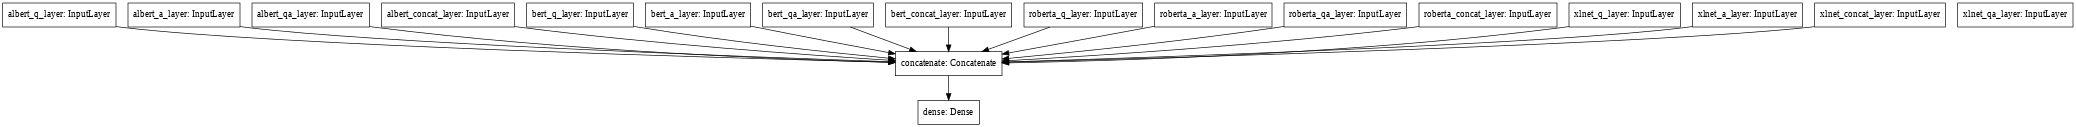

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', 
                          show_shapes=False, 
                          show_layer_names=True, 
                          rankdir='TB', 
                          expand_nested=False, dpi=48
                          )

In [ ]:
# Defining rhos metric
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
  rhos = []
  for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
    rhos.append(spearmanr(tcol, pcol).correlation) 
  return np.nanmean(rhos)

In [ ]:
# making rhos tensorflow graph compatible
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)
metrics = [rhos]

In [ ]:
# Train data
train_data = {
    'albert_q_layer' : albert_train_q.values,
    'albert_a_layer' : albert_train_a.values,
    'albert_qa_layer' : albert_train_qa.values,
    'albert_concat_layer' : albert_train_concat.values,
    'bert_q_layer' : bert_train_q.values,
    'bert_a_layer' : bert_train_a.values,
    'bert_qa_layer' : bert_train_qa.values,
    'bert_concat_layer' : bert_train_concat.values,
    'roberta_q_layer' : roberta_train_q.values, 
    'roberta_a_layer' : roberta_train_a.values, 
    'roberta_qa_layer' : roberta_train_qa.values,
    'roberta_concat_layer' : roberta_train_concat.values,
    'xlnet_q_layer' : xlnet_train_q.values,
    'xlnet_a_layer' : xlnet_train_a.values,
    'xlnet_qa_layer' : xlnet_train_qa.values,
    'xlnet_concat_layer' : xlnet_train_concat.values
}

In [ ]:
# Test data
test_data = {
    'albert_q_layer' : albert_test_q.values,
    'albert_a_layer' : albert_test_a.values,
    'albert_qa_layer' : albert_test_qa.values,
    'albert_concat_layer' : albert_test_concat.values,
    'bert_q_layer' : bert_test_q.values,
    'bert_a_layer' : bert_test_a.values,
    'bert_qa_layer' : bert_test_qa.values,
    'bert_concat_layer' : bert_test_concat.values,
    'roberta_q_layer' : roberta_test_q.values, 
    'roberta_a_layer' : roberta_test_a.values, 
    'roberta_qa_layer' : roberta_test_qa.values,
    'roberta_concat_layer' : roberta_test_concat.values,
    'xlnet_q_layer' : xlnet_test_q.values,
    'xlnet_a_layer' : xlnet_test_a.values,
    'xlnet_qa_layer' : xlnet_test_qa.values,
    'xlnet_concat_layer' : xlnet_test_concat.values
}

In [ ]:
# Target values
target_label = X.values

#### Let's try with Binary Crossentropy as loss function

In [ ]:
# Compiling and training the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(train_data, target_label, epochs=5, batch_size=4)

Epoch 1/5
   7/1520 [..............................] - ETA: 25s - loss: 0.7367 - rhos: -0.0030

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


1520/1520 [==============================] - 29s 19ms/step - loss: 0.4160 - rhos: 0.2818
Epoch 2/5
1520/1520 [==============================] - 30s 19ms/step - loss: 0.3679 - rhos: 0.4385
Epoch 3/5
1520/1520 [==============================] - 30s 20ms/step - loss: 0.3530 - rhos: 0.4887
Epoch 4/5
1520/1520 [==============================] - 30s 20ms/step - loss: 0.3441 - rhos: 0.5102
Epoch 5/5
1520/1520 [==============================] - 30s 20ms/step - loss: 0.3383 - rhos: 0.5254


In [ ]:
pred = model.predict(test_data)
df = pd.concat([test['qa_id'], pd.DataFrame(pred, columns=submission.columns[1:])], axis=1) 
df.to_csv('output_bce.csv', index=False)

#### Let's try with Mean squared error as loss function

In [ ]:
model = create_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=metrics)
model.fit(train_data, target_label, epochs=20, batch_size=32, validation_split=0.15)

concat_layer.shape: (None, 330)
Epoch 1/20
  7/162 [>.............................] - ETA: 3s - loss: 0.1781 - rhos: 0.0372

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


162/162 [==============================] - 5s 33ms/step - loss: 0.0710 - rhos: 0.2189 - val_loss: 0.0449 - val_rhos: 0.2965
Epoch 2/20
162/162 [==============================] - 5s 31ms/step - loss: 0.0389 - rhos: 0.3613 - val_loss: 0.0363 - val_rhos: 0.3751
Epoch 3/20
162/162 [==============================] - 5s 32ms/step - loss: 0.0330 - rhos: 0.4170 - val_loss: 0.0330 - val_rhos: 0.4077
Epoch 4/20
162/162 [==============================] - 5s 31ms/step - loss: 0.0301 - rhos: 0.4468 - val_loss: 0.0315 - val_rhos: 0.4289
Epoch 5/20
162/162 [==============================] - 5s 32ms/step - loss: 0.0283 - rhos: 0.4650 - val_loss: 0.0301 - val_rhos: 0.4444
Epoch 6/20
162/162 [==============================] - 5s 30ms/step - loss: 0.0270 - rhos: 0.4781 - val_loss: 0.0290 - val_rhos: 0.4549
Epoch 7/20
162/162 [==============================] - 5s 30ms/step - loss: 0.0259 - rhos: 0.4923 - val_loss: 0.0283 - val_rhos: 0.4668
Epoch 8/20
162/162 [==============================] - 5s 32ms/step

In [ ]:
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

pred = model.predict(test_data)
df = pd.concat([test['qa_id'], pd.DataFrame(pred, columns=submission.columns[1:])], axis=1) 
df.to_csv('output_mse.csv', index=False)
df.head(5)

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.929953,0.588778,0.173808,0.704667,0.506668,0.626820,0.657385,0.633848,0.470087,0.003606,0.782632,0.598458,0.055393,0.010268,0.043980,0.023461,0.112843,0.031849,0.786806,0.002005,0.894386,0.918082,0.597161,0.962262,0.979141,0.846639,0.103033,0.034818,0.829037,0.922894
1,46,0.873381,0.401949,0.010194,0.762220,0.658924,0.903504,0.526282,0.474451,0.127673,0.003629,0.538835,0.335842,0.008706,0.004460,0.002825,0.018158,0.908804,0.131773,0.111123,0.002190,0.642791,0.940528,0.661148,0.965433,0.968704,0.886950,0.945011,0.125612,0.054786,0.882147
2,70,0.888685,0.683490,0.021943,0.855611,0.929249,0.933174,0.580072,0.500860,0.073608,0.004534,0.144041,0.709003,0.039196,0.011252,0.020806,0.028238,0.061968,0.094244,0.694165,0.000927,0.864293,0.938449,0.666113,0.953816,0.984006,0.869497,0.073535,0.138778,0.930909,0.904342
3,132,0.844835,0.451844,0.013114,0.745299,0.748173,0.892468,0.550689,0.417053,0.062079,0.003084,0.508274,0.034840,0.007715,0.007077,0.002429,0.015865,0.857744,0.169340,0.570163,0.001368,0.672170,0.955912,0.663100,0.971876,0.980682,0.888864,0.911538,0.207109,0.501781,0.895911
4,200,0.908349,0.335955,0.035499,0.765231,0.770920,0.823510,0.606990,0.620674,0.080019,0.002934,0.488921,0.462245,0.029202,0.009124,0.013688,0.029170,0.115312,0.137667,0.719658,0.001088,0.696355,0.910407,0.673428,0.961331,0.974546,0.864453,0.129707,0.177662,0.464296,0.890062


#### Let's try Mean of predicted values from all the previous transformr models

In [ ]:
# weights for albert, bert, roberta and xlnet predictions.
a1, a2 = 0, 0
b1, b2 = 1, 1
r1, r2 = 1, 1
x1, x2 = 0, 1

pred_mean = ((albert_test_qa * a1 + albert_test_concat * a2)
            + (bert_test_qa * b1 + bert_test_concat * b2)
            + (roberta_test_qa * r1 + roberta_test_concat * r2)
            + (xlnet_test_qa * x1 + xlnet_test_concat * x2)) / (a1 + a2 + b1 + b2 + r1 + r2 + x1 + x2)

# saving the predicted labels as dataframes
df = pd.concat([test['qa_id'], pd.DataFrame(optimize_ranks(pred_mean.values), columns=submission.columns[1:])], axis=1) 
df.to_csv('output.csv', index=False)b

In [ ]:
df.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.973333,0.733333,0.16,0.551111,0.706667,0.693333,0.733333,0.666667,0.506667,0.003276,0.653333,0.653333,0.08,0.16,0.08,0.08,0.160000,0.080000,0.493333,0.000535,0.946667,0.946667,0.626667,0.973333,0.973333,0.853333,0.160000,0.08,0.751111,0.946667
1,46,0.866667,0.520000,0.08,0.768889,0.826667,0.946667,0.626667,0.480000,0.213333,0.004085,0.435556,0.520000,0.08,0.08,0.08,0.08,0.926667,0.213333,0.080000,0.000290,0.666667,0.973333,0.626667,0.973333,1.000000,0.866667,0.946667,0.16,0.080000,0.895556
2,70,0.913333,0.733333,0.08,0.840000,0.946667,0.973333,0.653333,0.480000,0.160000,0.003058,0.213333,0.706667,0.08,0.08,0.08,0.08,0.160000,0.160000,0.506667,0.000715,0.913333,0.973333,0.653333,1.000000,1.000000,0.900000,0.160000,0.08,0.853333,0.926667
3,132,0.913333,0.533333,0.08,0.720000,0.826667,0.926667,0.582222,0.466667,0.160000,0.009114,0.493333,0.080000,0.08,0.08,0.08,0.08,0.913333,0.213333,0.373333,0.000203,0.813333,0.973333,0.693333,1.000000,1.000000,0.913333,0.926667,0.16,0.435556,0.895556
4,200,0.946667,0.506667,0.08,0.782222,0.813333,0.913333,0.693333,0.653333,0.213333,0.012948,0.435556,0.564444,0.08,0.08,0.08,0.08,0.266667,0.160000,0.480000,0.000996,0.751111,0.926667,0.626667,0.973333,0.973333,0.866667,0.213333,0.16,0.506667,0.926667


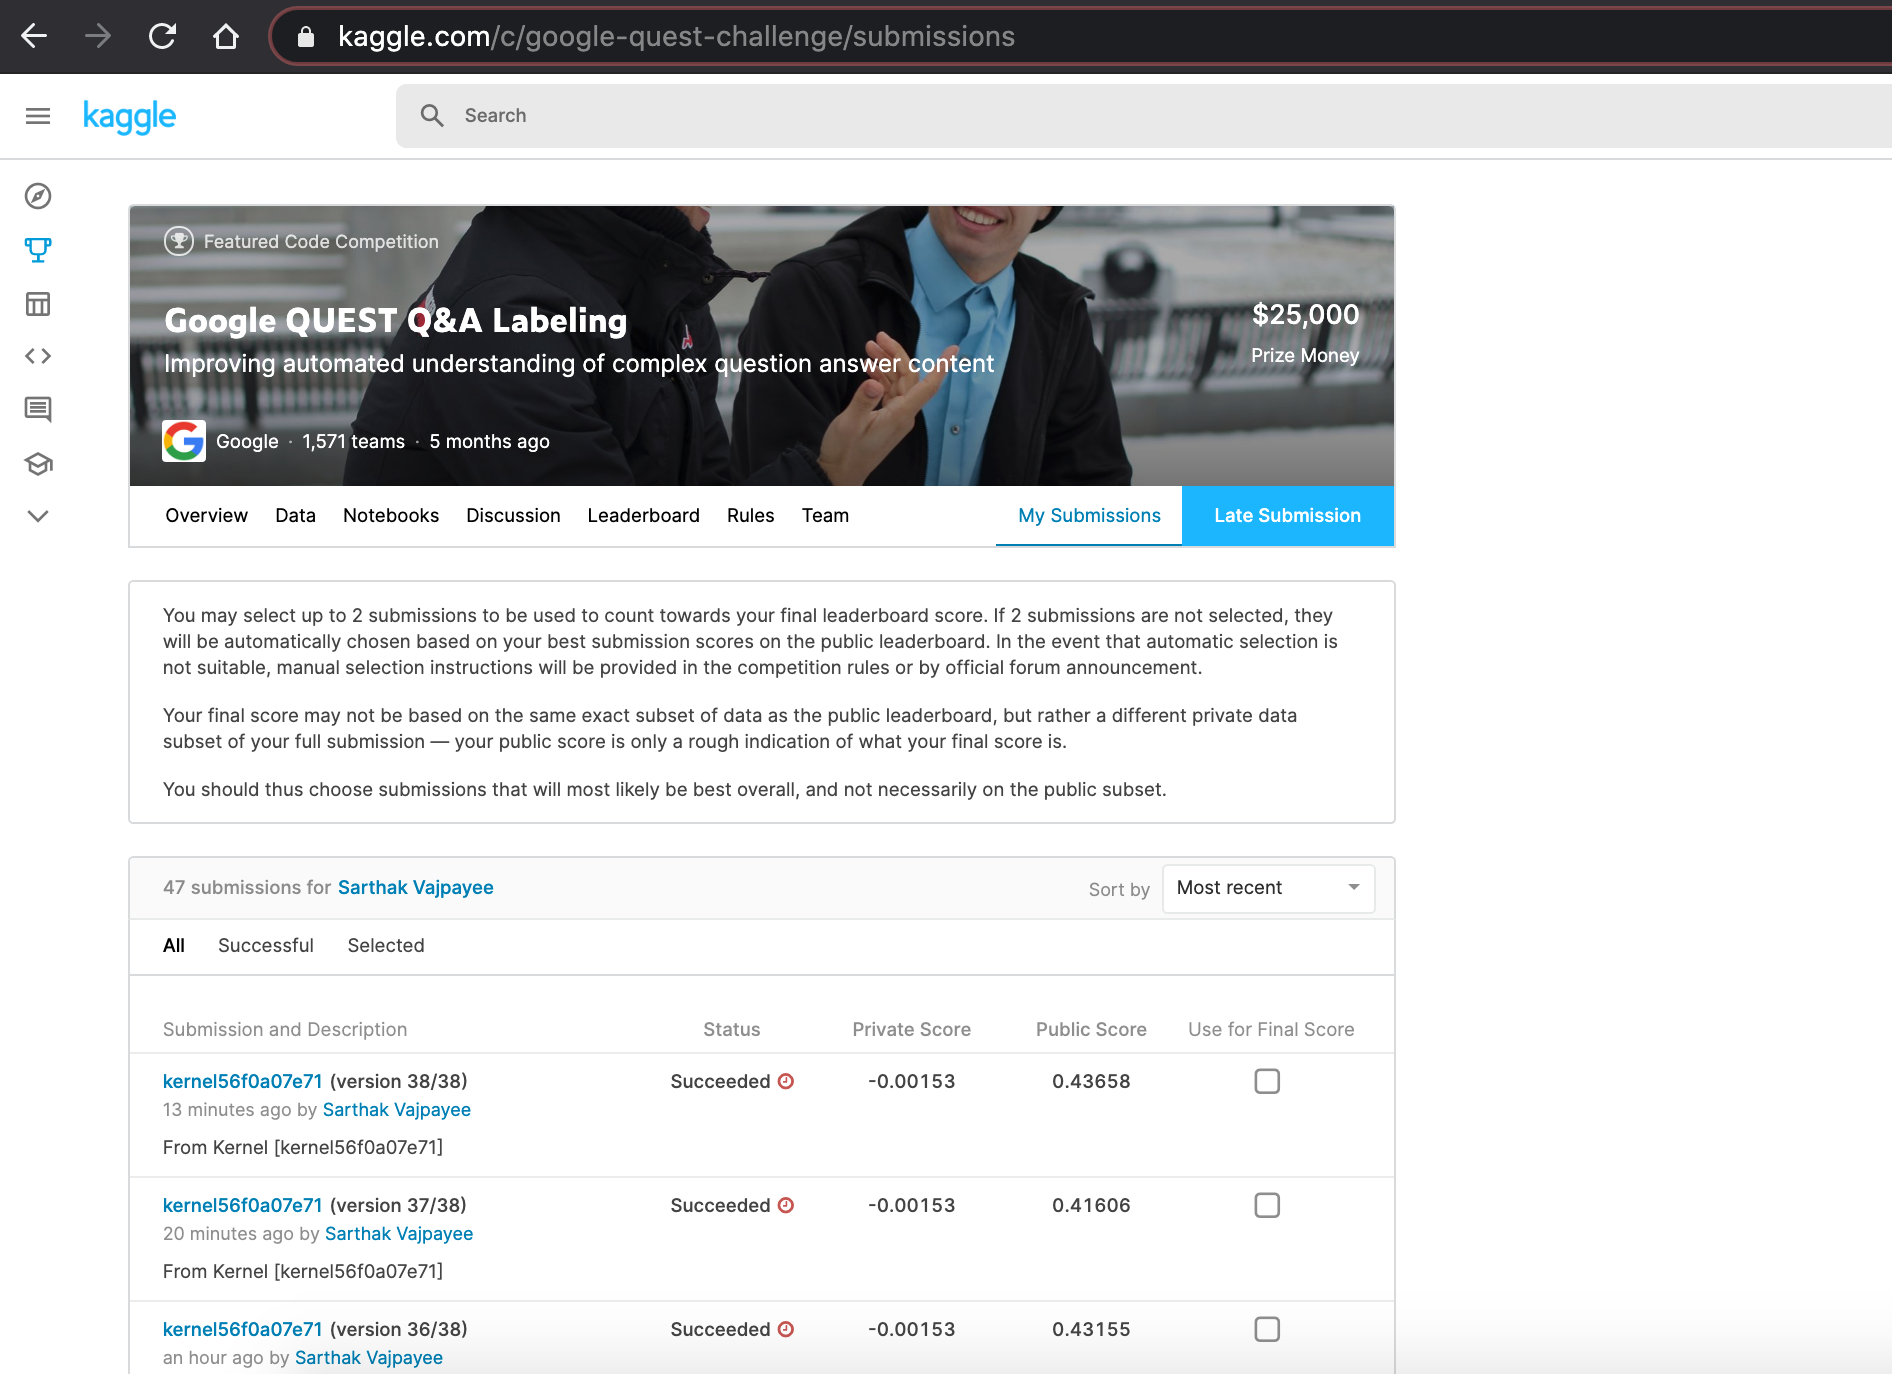

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('score.png', width=1000, height=740)

### Using the above architecture, I was able to achieve a score of 0.43658 (top 4.4% in the kaggle leaderboard).